In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/shihuitay/Datasets/main/heart_disease_uci.csv')

In [3]:
# Inspect the first 10 rows
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [4]:
# Check for the data type, size and null values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Examine the statistical data
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.00,920.00,861.00,890.00,865.00,858.00,309.00,920.00
mean,460.50,53.51,132.13,199.13,137.55,0.88,0.68,1.00
std,265.73,9.42,19.07,110.78,25.93,1.09,0.94,1.14
min,1.00,28.00,0.00,0.00,60.00,-2.60,0.00,0.00
25%,230.75,47.00,120.00,175.00,120.00,0.00,0.00,0.00
50%,460.50,54.00,130.00,223.00,140.00,0.50,0.00,1.00
75%,690.25,60.00,140.00,268.00,157.00,1.50,1.00,2.00
max,920.00,77.00,200.00,603.00,202.00,6.20,3.00,4.00


In [6]:
# Remove the column named 'id' and 'dataset'
df.drop(['id', 'dataset'], axis=1, inplace=True)

In [7]:
# Verify the columns have dropped
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.00,233.00,True,lv hypertrophy,150.00,False,2.30,downsloping,0.00,fixed defect,0
1,67,Male,asymptomatic,160.00,286.00,False,lv hypertrophy,108.00,True,1.50,flat,3.00,normal,2
2,67,Male,asymptomatic,120.00,229.00,False,lv hypertrophy,129.00,True,2.60,flat,2.00,reversable defect,1
3,37,Male,non-anginal,130.00,250.00,False,normal,187.00,False,3.50,downsloping,0.00,normal,0
4,41,Female,atypical angina,130.00,204.00,False,lv hypertrophy,172.00,False,1.40,upsloping,0.00,normal,0


In [8]:
# Check for columns with missing values
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
age           0
sex           0
cp            0
num           0
dtype: int64

In [10]:
# Identify and handle missing values
df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
87,53,Female,non-anginal,128.00,216.00,False,lv hypertrophy,115.00,False,0.00,upsloping,0.00,NaN,0
166,52,Male,non-anginal,138.00,223.00,False,normal,169.00,False,0.00,upsloping,NaN,normal,0
192,43,Male,asymptomatic,132.00,247.00,True,lv hypertrophy,143.00,True,0.10,flat,NaN,reversable defect,1
266,52,Male,asymptomatic,128.00,204.00,True,normal,156.00,True,1.00,flat,0.00,NaN,2
287,58,Male,atypical angina,125.00,220.00,False,normal,144.00,False,0.40,flat,NaN,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.00,333.00,True,st-t abnormality,154.00,False,0.00,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.00,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.00,223.00,True,st-t abnormality,100.00,False,0.00,NaN,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.00,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
# For categorical columns with less than 10% missing value, we drop the rows
df.dropna(subset=['fbs', 'exang', 'restecg'], inplace=True)

In [12]:
# For non-categorical columns with less than 10% missing value, we impute the missing values with mean
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['thalch'].fillna(df['thalch'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)

In [13]:
# For categorical columns with more than 10% missing value, we introduce an "unknown" category
df['ca'].fillna('unknown', inplace=True)
df['thal'].fillna('unknown', inplace=True)
df['slope'].fillna('unknown', inplace=True)

In [14]:
# Check for duplicated rows
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
404,49,Female,atypical angina,110.00,219.17,False,normal,160.00,False,0.00,unknown,unknown,unknown,0
405,49,Female,atypical angina,110.00,219.17,False,normal,160.00,False,0.00,unknown,unknown,unknown,0
859,58,Male,non-anginal,150.00,219.00,False,st-t abnormality,118.00,True,0.00,unknown,unknown,unknown,2
907,58,Male,non-anginal,150.00,219.00,False,st-t abnormality,118.00,True,0.00,unknown,unknown,unknown,2


In [15]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)

In [16]:
# Change dtype of columns and rename categories

# so that 0:Female, 1:Male
df['sex'] = (df['sex'] == 'Male').astype(int)

# so that 0:typical angina, 1:atypical angina, 2:non-anginal, 3:asymptomatic
df['cp'] = df['cp'].astype('category').cat.rename_categories({
    'typical angina': 0, 
    'atypical angina': 1, 
    'non-anginal': 2,
    'asymptomatic': 3,
}) 

# so that 0:False, 1:True
df['fbs'] = df['fbs'].astype(int) 

# so that 0:normal, 1:st-t abnormality, 2:lv hypertrophy
df['restecg'] = df['restecg'].astype('category').cat.rename_categories({
    'normal': 0,
    'st-t abnormality': 1,
    'lv hypertrophy': 2,
}) 

# so that 1:True, 0:False
df['exang'] = df['exang'].astype(int)

# so that 0:upsloping, 1:flat, 2:downsloping, 3:unknown
df['slope'] = df['slope'].astype('category').cat.rename_categories({
    'upsloping': 0,
    'flat': 1,
    'downsloping': 2,
    'unknown': 3,
})

# so that 0:0, 1:1, 2:2, 3:3, 4:unknown
df['ca'] = df['ca'].astype('category').cat.rename_categories({
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    'unknown': 4,
})

# so that 0:normal, 1:fixed defect, 2:reversable defect, 3:unknown
df['thal'] = df['thal'].astype('category').cat.rename_categories({
    'normal': 0,
    'fixed defect': 1,
    'reversable defect': 2,
    'unknown': 3,
}) 

# so that 0:No heart disease, 1:Presence of heart disease
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

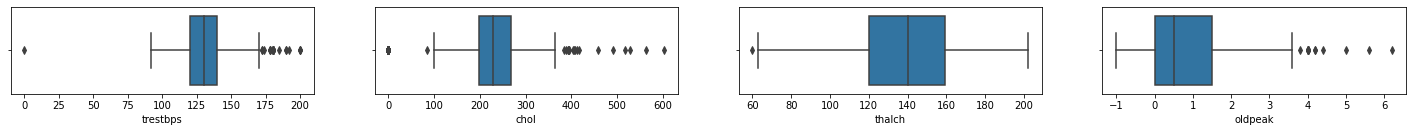

In [17]:
# Visualize outliers using boxplots
plt.figure(figsize=(25,15))
plt.subplot(8, 4, 1)
sns.boxplot(df['trestbps'])

plt.subplot(8, 4, 2)
sns.boxplot(df['chol'])

plt.subplot(8, 4, 3)
sns.boxplot(df['thalch'])

plt.subplot(8, 4, 4)
sns.boxplot(df['oldpeak'])

In [18]:
# Remove outliers with IQR
col_index = ['trestbps', 'chol', 'thalch', 'oldpeak']
def remove_outlier(df):
    for i in df.loc[:, col_index].columns :        
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        Lower = Q1 - (1.5 * IQR)
        Upper = Q3 + (1.5 * IQR)
        df.loc[:, i] = np.where(df[i].values > Upper, Upper - 1, df[i].values)
        df.loc[:, i] = np.where(df[i].values < Lower, Lower + 1, df[i].values)

remove_outlier(df)

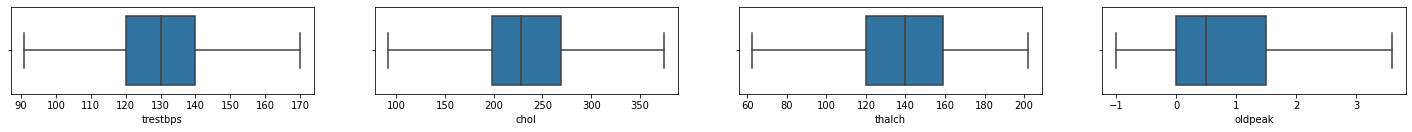

In [19]:
# Check the boxplots after outliers removal
plt.figure(figsize=(25, 15))
plt.subplot(8, 4, 1)
sns.boxplot(df['trestbps'])

plt.subplot(8, 4, 2)
sns.boxplot(df['chol'])

plt.subplot(8, 4, 3)
sns.boxplot(df['thalch'])

plt.subplot(8, 4, 4)
sns.boxplot(df['oldpeak'])

In [20]:
# Rename the 'num' column to 'heart disease'
df.rename({'num': 'heart disease'}, axis=1, inplace=True)

In [21]:
# Convert categorical variables into dummy variables
cat_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_ml = pd.get_dummies(df, columns=cat_variables)
df_ml.filter(regex='_|'.join(cat_variables) + '_').head()

,sex_0,sex_1,cp_3,cp_1,cp_2,cp_0,fbs_0,fbs_1,restecg_2,restecg_0,restecg_1,exang_0,exang_1,slope_2,slope_1,slope_3,slope_0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_4.0,thal_1,thal_0,thal_2,thal_3
0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0


In [22]:
# Scale all the non-categorical variables to prepare for machine learning
scaled_col = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df_ml[scaled_col] = StandardScaler().fit_transform(df_ml[scaled_col])
df_ml[scaled_col].head()

,age,trestbps,chol,thalch,oldpeak
0,1.05,0.74,0.08,0.44,1.45
1,1.48,1.63,0.88,-1.19,0.64
2,1.48,-0.74,0.02,-0.38,1.75
3,-1.70,-0.15,0.34,1.87,2.65
4,-1.28,-0.15,-0.35,1.29,0.54


In [23]:
# Final dataframe
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,heart disease
0,63,1,0,145.00,233.00,1,2,150.00,0,2.30,2,0.00,1,0
1,67,1,3,160.00,286.00,0,2,108.00,1,1.50,1,3.00,0,1
2,67,1,3,120.00,229.00,0,2,129.00,1,2.60,1,2.00,2,1
3,37,1,2,130.00,250.00,0,0,187.00,0,3.50,2,0.00,0,0
4,41,0,1,130.00,204.00,0,2,172.00,0,1.40,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,1,3,158.00,170.00,0,1,138.00,1,0.00,3,4.00,3,1
914,46,1,3,134.00,310.00,0,0,126.00,0,0.00,3,4.00,0,1
915,54,0,3,127.00,333.00,1,1,154.00,0,0.00,3,4.00,3,1
917,55,1,3,122.00,223.00,1,1,100.00,0,0.00,3,4.00,1,1


In [24]:
# For machine learning 
df_ml

,age,trestbps,chol,thalch,oldpeak,heart disease,sex_0,sex_1,cp_3,cp_1,cp_2,cp_0,fbs_0,fbs_1,restecg_2,restecg_0,restecg_1,exang_0,exang_1,slope_2,slope_1,slope_3,slope_0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_4.0,thal_1,thal_0,thal_2,thal_3
0,1.05,0.74,0.08,0.44,1.45,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,1.48,1.63,0.88,-1.19,0.64,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1.48,-0.74,0.02,-0.38,1.75,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
3,-1.70,-0.15,0.34,1.87,2.65,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,-1.28,-0.15,-0.35,1.29,0.54,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.95,1.51,-0.86,-0.03,-0.86,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
914,-0.75,0.09,1.24,-0.49,-0.86,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
915,0.10,-0.32,1.58,0.59,-0.86,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
917,0.20,-0.62,-0.07,-1.50,-0.86,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [25]:
# Save the dataframes to csv
df.to_csv('heart.csv')
df_ml.to_csv('heart_machine_learning.csv')